In [1]:
%matplotlib inline
from copy import deepcopy
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

### 1. Load Data

In [2]:
# Importing the dataset
data = pd.read_csv('dataset.csv')
print(data.shape)
data.head()

(5000, 2)


,V1,V2
0,4.53320,6.06542
1,5.20651,5.94591
2,5.16664,6.60290
3,5.70023,5.70741
4,5.24035,5.18443


In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values

for key in data.keys():
    print(key)

V1
V2


In [4]:
X = np.array(list(zip(f1, f2)))
X

array([[4.5332 , 6.06542],
       [5.20651, 5.94591],
       [5.16664, 6.6029 ],
       ...,
       [3.51482, 3.34662],
       [3.41057, 3.41338],
       [3.74464, 2.84441]])

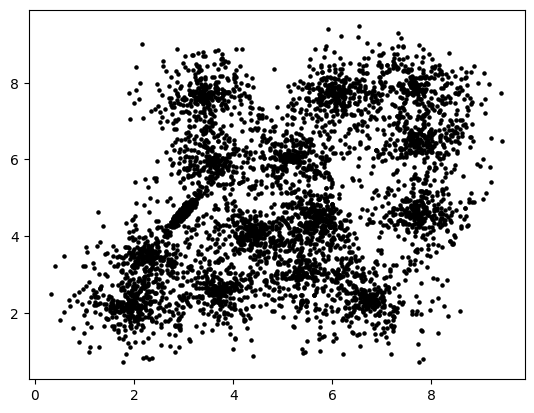

In [5]:
plt.scatter(f1, f2, c='black', s=5)
plt.show()

### 1.1 Define Euclidean Distances function

In [6]:
def euclidean_distances(x, y,ax=1):
    """Calculate the Euclidean distances between corresponding points in two arrays."""
    if x.shape != y.shape:
        raise ValueError("Both arrays must have the same shape")
    
    # Calculate squared differences and sum them
    squared_diffs = np.sum((x - y) ** 2, axis=ax)
    
    # Take the square root of the sum
    distances = np.sqrt(squared_diffs)
    
    return distances

###  Resourse for [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html)

In [7]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [8]:
# Example usage
x  = np.array([[2.121, 3.1213],[3.2323, 4.2131],[4.2231, 6.32]])
y  = np.array([[5.121, 1.1213],[7.2323, 9.2131],[3.2331, 1.32]])

a = euclidean_distances(x, y)
b = dist(x, y)
print("Euclidean Distance:", a)
print('c',b)

Euclidean Distance: [3.60555128 6.40312424 5.09706778]
c [3.60555128 6.40312424 5.09706778]


## 2. Initialize clusters

In [9]:
# Number of clusters
k = 6
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-2, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-2, size=k)
print(C_x, C_y)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print(C)

[0 5 0 1 4 2] [3 2 0 4 6 3]
[[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]]


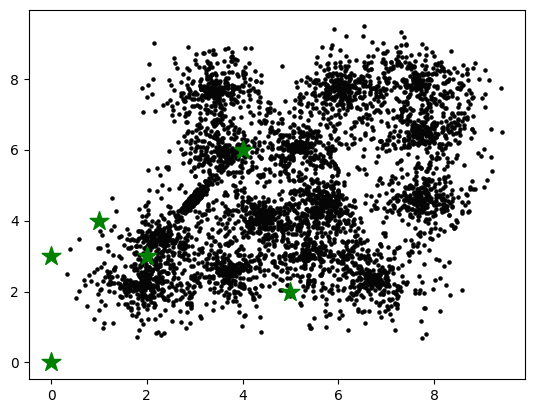

In [10]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=5)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')
plt.show()

In [11]:
for i in range(len(X)):
    distances = dist(X[i], C)
    cluster = np.argmin(distances)
    print(X[i],C,cluster)

[4.5332  6.06542] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.20651 5.94591] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.16664 6.6029 ] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.70023 5.70741] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.24035 5.18443] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.44957 5.05968] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.03105 5.77815] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.15747 6.01704] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.88509 6.66153] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.33602 5.84471] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[4.88815 7.36618] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.55436 6.48459] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.25149 5.98859] [[0. 3.]
 [5. 2.]
 [0. 0.]
 [1. 4.]
 [4. 6.]
 [2. 3.]] 4
[5.27235 5.97804] [[0. 3.

### 2.1 Updates the centroids

In [12]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)
# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))
# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)
print(error)
# Loop will run till the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
            
#         print(distances,clusters[i])
    # Storing the old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        if len(points) > 0:
            C[i] = np.mean(points, axis=0)
        else:
            C[i] = X[np.random.randint(len(X))]

          

    error = dist(C, C_old, None)


10.954451150103322


In [13]:
C, C_old

(array([[3.1608415, 4.7369366],
        [7.223857 , 3.4504843],
        [2.562836 , 2.5969625],
        [4.0403104, 6.8827324],
        [7.1841264, 7.309391 ],
        [5.2021403, 3.8830302]], dtype=float32),
 array([[3.1608415, 4.7369366],
        [7.223857 , 3.4504843],
        [2.562836 , 2.5969625],
        [4.0403104, 6.8827324],
        [7.1841264, 7.309391 ],
        [5.2021403, 3.8830302]], dtype=float32))

### 2.2 Plot updated results

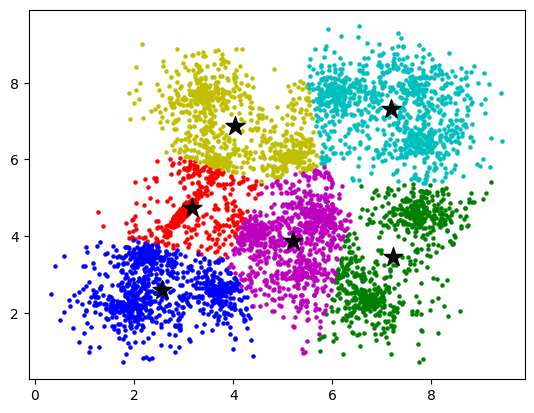

In [14]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=5, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.show()

## 3. The scikit-learn approach

In [15]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=4)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

### Try to review X, labels and centroids by print

In [16]:
# Your code:
X


array([[4.5332 , 6.06542],
       [5.20651, 5.94591],
       [5.16664, 6.6029 ],
       ...,
       [3.51482, 3.34662],
       [3.41057, 3.41338],
       [3.74464, 2.84441]])

In [17]:
labels

array([3, 3, 3, ..., 1, 1, 1], dtype=int32)

In [18]:
set(labels)

{np.int32(0), np.int32(1), np.int32(2), np.int32(3)}

### Comparing with scikit-learn centroids

In [19]:
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[3.1608415 4.7369366]
 [7.223857  3.4504843]
 [2.562836  2.5969625]
 [4.0403104 6.8827324]
 [7.1841264 7.309391 ]
 [5.2021403 3.8830302]]
[[7.18076121 7.28953538]
 [2.94737417 3.29702472]
 [6.29144849 3.63586046]
 [3.99038232 6.61266427]]


### Plot results - Please visualize the results and add your name to them

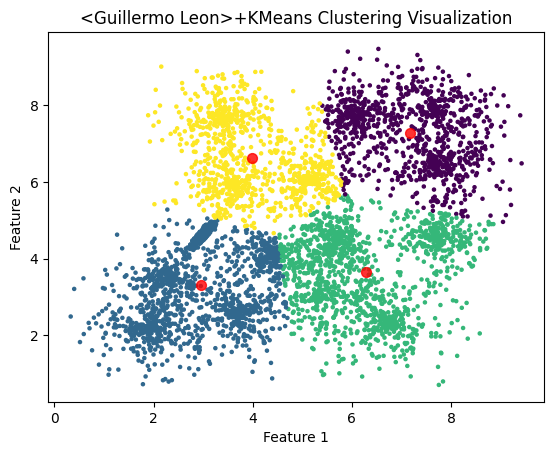

In [20]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50, alpha=0.8)


plt.title('<Guillermo Leon>+KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

You can see that the centroid values are equal, but in different order.

### 3.2 Another example

We will generate a new dataset using make_blobs function.

In [21]:
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (10, 8)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

### Try to review X, y

In [22]:
#Your code:
x

array([[2.121 , 3.1213],
       [3.2323, 4.2131],
       [4.2231, 6.32  ]])

In [23]:
y

array([1, 3, 3, 3, 3, 0, 3, 0, 3, 0, 2, 0, 2, 1, 3, 0, 3, 3, 1, 2, 2, 2,
       1, 3, 1, 1, 0, 1, 3, 2, 2, 3, 0, 0, 1, 3, 0, 1, 1, 1, 3, 2, 2, 1,
       0, 2, 1, 0, 2, 1, 2, 2, 0, 3, 1, 2, 3, 1, 3, 1, 1, 2, 1, 1, 0, 2,
       0, 2, 2, 1, 2, 2, 3, 1, 0, 3, 3, 3, 0, 1, 1, 3, 2, 2, 0, 2, 3, 1,
       0, 0, 0, 0, 3, 1, 2, 2, 0, 1, 3, 1, 1, 0, 1, 0, 3, 1, 1, 1, 0, 1,
       1, 0, 3, 1, 0, 1, 3, 1, 3, 2, 2, 3, 0, 2, 0, 1, 3, 2, 1, 3, 2, 2,
       1, 3, 2, 2, 2, 2, 1, 0, 0, 1, 2, 1, 1, 3, 3, 0, 1, 0, 2, 3, 1, 2,
       3, 3, 1, 0, 2, 1, 2, 0, 1, 2, 1, 0, 0, 3, 3, 0, 0, 1, 3, 0, 2, 3,
       3, 0, 1, 2, 2, 2, 1, 2, 0, 2, 2, 2, 3, 2, 3, 2, 0, 0, 2, 1, 1, 3,
       1, 1, 2, 2, 3, 2, 0, 2, 3, 2, 1, 3, 3, 1, 3, 3, 3, 2, 3, 1, 3, 1,
       3, 3, 1, 3, 0, 1, 0, 0, 3, 0, 1, 3, 0, 3, 2, 1, 1, 2, 2, 2, 0, 0,
       3, 0, 2, 3, 2, 2, 0, 1, 3, 1, 3, 0, 1, 2, 1, 0, 2, 3, 0, 2, 2, 3,
       2, 3, 0, 3, 2, 0, 1, 3, 3, 2, 0, 2, 0, 2, 1, 0, 2, 3, 0, 3, 1, 0,
       1, 0, 1, 2, 2, 0, 3, 3, 3, 3, 0, 2, 3, 0, 2,

In [24]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_

C:\Users\guill\AppData\Local\Temp\ipykernel_3556\2172538349.py:1: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:, 0], X[:, 1], s=5, cmap='viridis')


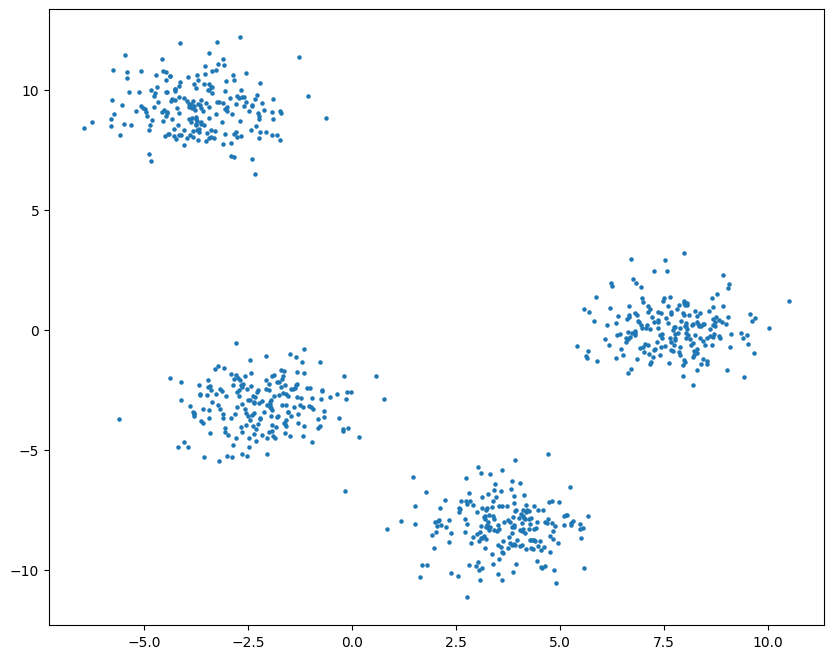

In [25]:
plt.scatter(X[:, 0], X[:, 1], s=5, cmap='viridis')
plt.show()

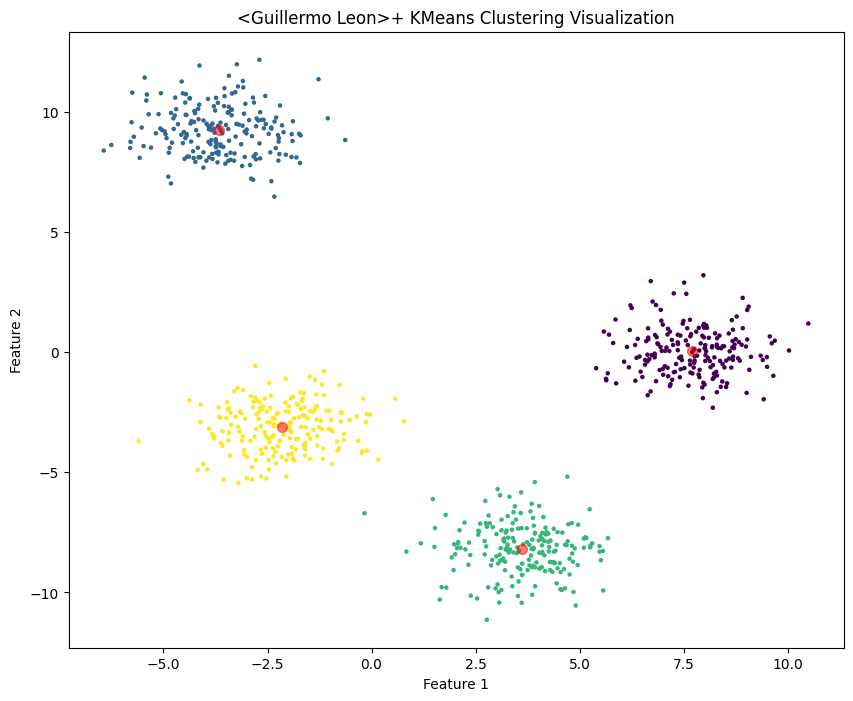

In [26]:
# Plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=5, cmap='viridis')

# Plotting the cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=50, alpha=0.5)

plt.title('<Guillermo Leon>+ KMeans Clustering Visualization')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# 🎯 Practice Lab: K-Means Clustering

### 🧠 Objective
In this exercise, you will:
1. Generate a small synthetic dataset.  
2. Apply **K-Means clustering** to group similar data points.  
3. Visualize the clusters and centroids.  
4. Interpret how K-Means divides data based on similarity.

---

## 🧩 Scenario

You are given data representing **study hours** and **sleep hours** of several students.  
You need to cluster them into groups of **similar learning patterns**.

| Student | Study_Hours | Sleep_Hours |
|----------|--------------|-------------|
| A | 2 | 9 |
| B | 3 | 8 |
| C | 4 | 7 |
| D | 6 | 6 |
| E | 7 | 5 |
| F | 8 | 5 |
| G | 9 | 4 |

Your task: Use **K-Means** to group these students into **two clusters**:
- Cluster 1 → “High study, low sleep”  
- Cluster 2 → “Low study, high sleep”

---

## 🧠 Task Requirements

1. Create the dataset as a pandas DataFrame.  
2. Use **scikit-learn’s KMeans** to find clusters (k=2).  
3. Add the predicted cluster labels to the DataFrame.  
4. Plot the data points with color-coded clusters and centroids.  
5. Interpret which students belong to which group.

---



C:\Users\guill\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


  Student  Study_Hours  Sleep_Hours  Cluster
0       A            2            9        1
1       B            3            8        1
2       C            4            7        1
3       D            6            6        2
4       E            7            5        2
5       F            8            5        2
6       G            9            4        2
Cluster 1 (High study, low sleep): ['A', 'B', 'C']
Cluster 2 (Low study, high sleep): ['D', 'E', 'F', 'G']


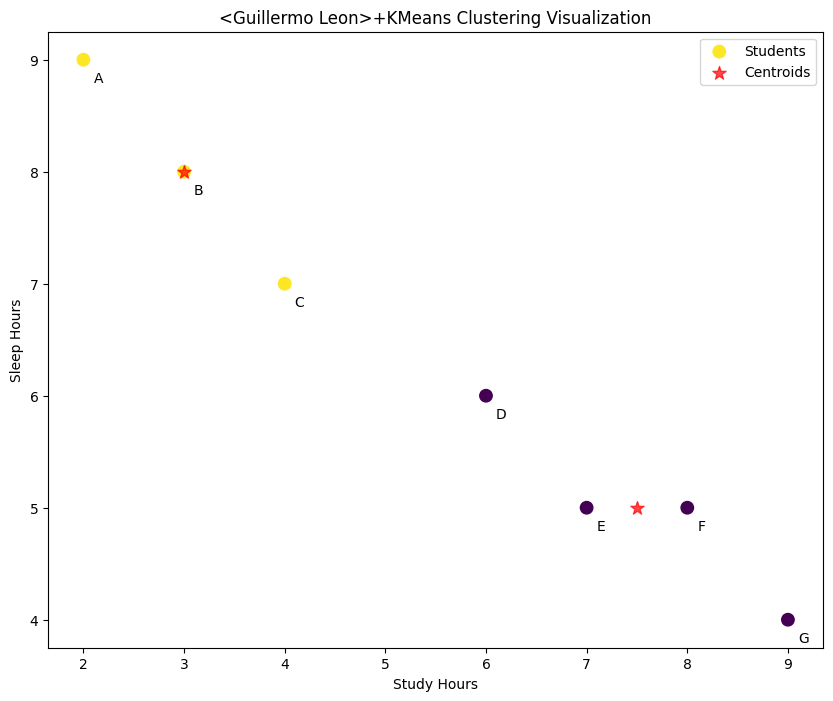

In [27]:
#creating the dataset
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G'],
    'Study_Hours': [2, 3, 4, 6, 7, 8, 9],
    'Sleep_Hours': [9, 8, 7, 6, 5, 5, 4]
}

#creating dataframe with dataset values
df = pd.DataFrame(data)

#getting the values
f1 = df['Study_Hours'].values
f2 = df['Sleep_Hours'].values

#zip them together into coordinate pairs
X = np.array(list(zip(f1, f2)))

#K-Means model
kmeans = KMeans(n_clusters=2)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

#assigning the clusters to variables
cluster_1_label_id = 0
cluster_2_label_id = 1

#using np.where to assign 1 if the original label matches the ID we designated for Cluster 2, else 1.
df['Cluster'] = np.where(labels == cluster_1_label_id, 2, 1)
print(df)

#plotting the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis', label='Students')

#plotting the cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100, alpha=0.7, marker='*', label='Centroids')

#annotate each student within the graph
for i, name in enumerate(df['Student']):
    plt.annotate(name, (X[i, 0] + 0.1, X[i, 1] - 0.2))

#filter using the new 'Cluster' column values
students_cluster1 = df[df['Cluster'] == 1]['Student'].tolist()
students_cluster2 = df[df['Cluster'] == 2]['Student'].tolist()

#print statements will reflect correct students in each cluster
print(f"Cluster 1 (High study, low sleep): {students_cluster1}")
print(f"Cluster 2 (Low study, high sleep): {students_cluster2}")

#labels and title
plt.title('<Guillermo Leon>+KMeans Clustering Visualization')
plt.xlabel('Study Hours')
plt.ylabel('Sleep Hours')
plt.legend()
plt.show()